# Testing
### Gleichstellungsindikatoren: Angestellte der Stadtverwaltung seit 2016
Datum: 29.11.2021

**Importiere die notwendigen Packages**

In [1]:
#pip install geopandas altair fiona requests folium mplleaflet contextily seaborn datetime plotly

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 
import requests

In [3]:
import plotly.express as px


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [4]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/

**Dataset auf PROD Datenkatalog**: https://data.stadt-zuerich.ch/dataset/

In [5]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "integ";
print(status)

integ


In [8]:
# Filepath
if status == "prod":
    fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/"
else:
    fp = r"//szh/ssz/applikationen/OGD/Daten/Quelldaten/PRD/gleichstellung/intiale_datenaufbereitung/ZFG_Sample.csv"
#download from INT-Datacatalog:
# \\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bfs_bevreg_todesursache_alter_geschlecht_seit1995_OD3110\BEV311OD3110.csv
print(fp)

//szh/ssz/applikationen/OGD/Daten/Quelldaten/PRD/gleichstellung/intiale_datenaufbereitung/ZFG_Sample.csv


In [26]:
# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=';',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    encoding = "ANSI",
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [27]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [28]:
data2betested.head(3)

,Kalenderjahr,KalJahr/Monat,Buchungskreis,Unnamed: 3,Mitarbeiterkreis (PA),Unnamed: 5,Tarifgruppe,...,Lebensalter,Unnamed: 15,Beschäftigungsstatus,Unnamed: 17,HC,Anzahl Anstellungen,FTE
0,2020,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,36,36,3,aktiv,1,1,1
1,2020,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,57,57,3,aktiv,1,1,1
2,2020,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,29,29,3,aktiv,1,1,1


In [29]:
data2betested.dtypes

Kalenderjahr                       int64
KalJahr/Monat                    float64
Buchungskreis                      int64
Unnamed: 3                        object
Mitarbeiterkreis (PA)              int64
Unnamed: 5                        object
Tarifgruppe                       object
Unnamed: 7                        object
Kaderstufe                        object
Unnamed: 9                        object
Kennzeichen Vollzeit/Teilzeit     object
Unnamed: 11                       object
Geschlecht                         int64
Unnamed: 13                       object
Lebensalter                        int64
Unnamed: 15                        int64
Beschäftigungsstatus               int64
Unnamed: 17                       object
HC                                 int64
Anzahl Anstellungen                int64
FTE                              float64
dtype: object

In [30]:
data2betested.shape

(589, 21)

Beschreibe einzelne Attribute

In [31]:
data2betested.describe()

,Kalenderjahr,KalJahr/Monat,Buchungskreis,Mitarbeiterkreis (PA),Geschlecht,Lebensalter,Unnamed: 15,Beschäftigungsstatus,HC,Anzahl Anstellungen,FTE
count,589,589,589,589,589,589,589,589,589,589,589
mean,2020,1,1303,20,2,44,44,3,1,1,1
std,0,0,234,1,0,12,12,0,0,0,0
min,2020,1,1005,11,1,18,18,3,1,1,0
25%,2020,1,1070,20,1,34,34,3,1,1,1
50%,2020,1,1500,20,2,44,44,3,1,1,1
75%,2020,1,1520,20,2,54,54,3,1,1,1
max,2020,1,1530,20,2,65,65,3,4,4,3


Wie viele Nullwerte gibt es im Datensatz?

In [32]:
data2betested.isnull().sum()

Kalenderjahr                     0
KalJahr/Monat                    0
Buchungskreis                    0
Unnamed: 3                       0
Mitarbeiterkreis (PA)            0
Unnamed: 5                       0
Tarifgruppe                      0
Unnamed: 7                       0
Kaderstufe                       0
Unnamed: 9                       0
Kennzeichen Vollzeit/Teilzeit    0
Unnamed: 11                      0
Geschlecht                       0
Unnamed: 13                      0
Lebensalter                      0
Unnamed: 15                      0
Beschäftigungsstatus             0
Unnamed: 17                      0
HC                               0
Anzahl Anstellungen              0
FTE                              0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [33]:
data2betested['Kalenderjahr']=pd.to_datetime(data2betested['Kalenderjahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,Kalenderjahr,KalJahr/Monat,Buchungskreis,Unnamed: 3,Mitarbeiterkreis (PA),Unnamed: 5,Tarifgruppe,...,Lebensalter,Unnamed: 15,Beschäftigungsstatus,Unnamed: 17,HC,Anzahl Anstellungen,FTE
0,2020-01-01,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,36,36,3,aktiv,1,1,1
1,2020-01-01,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,57,57,3,aktiv,1,1,1
2,2020-01-01,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,29,29,3,aktiv,1,1,1
3,2020-01-01,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,30,30,3,aktiv,1,1,1
4,2020-01-01,1,1005,Gemeinderat,20,Verw.-u.Betriebspers,02/01/01/2/10,...,35,35,3,aktiv,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2020-01-01,1,1530,Bevölkerungsamt,20,Verw.-u.Betriebspers,02/01/01/2/08,...,33,33,3,aktiv,1,1,0
585,2020-01-01,1,1530,Bevölkerungsamt,20,Verw.-u.Betriebspers,02/01/01/2/08,...,38,38,3,aktiv,1,1,1
586,2020-01-01,1,1530,Bevölkerungsamt,20,Verw.-u.Betriebspers,02/01/01/2/08,...,40,40,3,aktiv,3,3,2
587,2020-01-01,1,1530,Bevölkerungsamt,20,Verw.-u.Betriebspers,02/01/01/2/08,...,44,44,3,aktiv,3,3,2


Bereite die Daten für die Grafik unten vor

In [36]:
Jahre = data2betested.groupby("Kalenderjahr")
len(Jahre)

1

In [37]:
for key, group in Jahre:
    print(key, len(group))


2020-01-01 00:00:00 589


In [38]:
#Hier nicht notwendig, da es keine Zeitangabe braucht.
#myJahr = "2020-01-01"
#aktuellesJahr=Jahre.get_group(myJahr)   
#aktuellesJahr

**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

Welche aggregierten Todesursachen gibt es überhaupt?

In [39]:
data2betested.dtypes

Kalenderjahr                     datetime64[ns]
KalJahr/Monat                           float64
Buchungskreis                             int64
Unnamed: 3                               object
Mitarbeiterkreis (PA)                     int64
Unnamed: 5                               object
Tarifgruppe                              object
Unnamed: 7                               object
Kaderstufe                               object
Unnamed: 9                               object
Kennzeichen Vollzeit/Teilzeit            object
Unnamed: 11                              object
Geschlecht                                int64
Unnamed: 13                              object
Lebensalter                               int64
Unnamed: 15                               int64
Beschäftigungsstatus                      int64
Unnamed: 17                              object
HC                                        int64
Anzahl Anstellungen                       int64
FTE                                     

In [48]:
#data2betested

In [46]:
mitarbeiterkreis = data2betested.groupby(['Mitarbeiterkreis (PA)', 'Unnamed: 5', 'Buchungskreis','Unnamed: 3'])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Mitarbeiterkreis (PA)', ascending=False)
#mitarbeiterkreis

In [47]:
buchungskreis = data2betested.groupby(['Buchungskreis','Unnamed: 3'])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Anzahl Anstellungen', ascending=False)
#buchungskreis    

In [50]:
Tarifgruppe=data2betested.groupby(['Tarifgruppe','Unnamed: 7'])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Anzahl Anstellungen', ascending=False)
#Tarifgruppe

In [53]:
Kaderstufe=data2betested.groupby(['Kaderstufe','Unnamed: 9'])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Kaderstufe', ascending=False)
#Kaderstufe

In [59]:
Kennzeichen_Vollzeit_Teilzeit =data2betested.groupby(['Kennzeichen Vollzeit/Teilzeit','Unnamed: 11'])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Kennzeichen Vollzeit/Teilzeit', ascending=False)
#Kennzeichen_Vollzeit_Teilzeit

,,Anzahl Anstellungen,FTE
Kennzeichen Vollzeit/Teilzeit,Unnamed: 11,,
V,A) Vollzeit,316,312
2,C) Teilzeit 2 - 0.00-49.99%,103,27
1,B) Teilzeit 1 - 50.00-89.99%,235,164


In [66]:
geschl_lebensalter =data2betested.groupby(['Geschlecht','Unnamed: 13','Lebensalter','Unnamed: 15' ])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Lebensalter', ascending=False)
geschl_lebensalter

Anzahl Anstellungen  FTE
Geschlecht Unnamed: 13 Lebensalter Unnamed: 15                          
2          weiblich    65          65                             1    1
1          männlich    65          65                             1    1
2          weiblich    64          64                             5    4
1          männlich    64          64                             5    4
2          weiblich    63          63                            11    7
...                                                             ...  ...
1          männlich    21          21                             1    1
2          weiblich    20          20                             8    7
                       19          19                             4    3
1          männlich    19          19                             3    3
                       18          18                             1    0

[93 rows x 2 columns]

In [62]:
Beschäftigungsstatus_HC =data2betested.groupby(['Beschäftigungsstatus','Unnamed: 17', 'HC'])[['Anzahl Anstellungen', 'FTE']].sum().sort_values('Anzahl Anstellungen', ascending=False)
#Beschäftigungsstatus_HC

Anzahl Anstellungen  FTE
Beschäftigungsstatus Unnamed: 17 HC                          
3                    aktiv       1                   537  404
                                 2                    89   75
                                 3                    24   22
                                 4                     4    3

In [67]:
data2betested.dtypes

Kalenderjahr                     datetime64[ns]
KalJahr/Monat                           float64
Buchungskreis                             int64
Unnamed: 3                               object
Mitarbeiterkreis (PA)                     int64
Unnamed: 5                               object
Tarifgruppe                              object
Unnamed: 7                               object
Kaderstufe                               object
Unnamed: 9                               object
Kennzeichen Vollzeit/Teilzeit            object
Unnamed: 11                              object
Geschlecht                                int64
Unnamed: 13                              object
Lebensalter                               int64
Unnamed: 15                               int64
Beschäftigungsstatus                      int64
Unnamed: 17                              object
HC                                        int64
Anzahl Anstellungen                       int64
FTE                                     

----------------------------------------------------------

In [61]:
mySelYearsVor2006 = data2betested[(data2betested.StichtagDatJahr < "2006")]
mySelYearsVor2006.sort_values('AnzSterWir', ascending=False)

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
1517,1999-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,299,Frauen
1858,2000-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,289,Frauen
824,1997-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,270,Frauen
1165,1998-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,252,Frauen
483,1996-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,248,Frauen
...,...,...,...,...,...,...,...
3277,2004-01-01,Perinatale Todesursachen,1000,11,85 und älter,0,Frauen
3276,2004-01-01,Perinatale Todesursachen,1000,10,80 – 84,0,Frauen
3275,2004-01-01,Perinatale Todesursachen,1000,9,75 – 79,0,Frauen
3274,2004-01-01,Perinatale Todesursachen,1000,8,70 – 74,0,Frauen


In [62]:
mySelYearsSeit2006 = data2betested[(data2betested.StichtagDatJahr > "2005")]
mySelYearsSeit2006.sort_values('AnzSterWir', ascending=False)

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
6115,2013-01-01,Demenz,400,11,85 und älter,269,Frauen
8018,2019-01-01,Demenz,400,11,85 und älter,235,Frauen
6742,2015-01-01,Demenz,400,11,85 und älter,231,Frauen
7710,2018-01-01,Demenz,400,11,85 und älter,230,Frauen
5807,2012-01-01,Demenz,400,11,85 und älter,223,Frauen
...,...,...,...,...,...,...,...
13201,2009-01-01,andere Unfälle,1152,2,1 – 14,0,Männer
13200,2009-01-01,andere Unfälle,1152,1,unter 1,0,Männer
6405,2014-01-01,Brustkrebs,214,4,30 – 44,0,Frauen
6413,2014-01-01,Chronische Bronchitis,643,1,unter 1,0,Frauen


In [38]:
mySelYears = data2betested[(data2betested.StichtagDatJahr == "2019") | (data2betested.StichtagDatJahr == "1996")]
mySelYears

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
341,1996-01-01,AIDS,102,1,unter 1,0,Frauen
342,1996-01-01,AIDS,102,2,1 – 14,0,Frauen
343,1996-01-01,AIDS,102,3,15 – 29,1,Frauen
344,1996-01-01,AIDS,102,4,30 – 44,15,Frauen
345,1996-01-01,AIDS,102,5,45 – 59,0,Frauen
...,...,...,...,...,...,...,...
16440,2019-01-01,übrige Kreislaufkrankheiten,539,7,65 – 69,1,Männer
16441,2019-01-01,übrige Kreislaufkrankheiten,539,8,70 – 74,6,Männer
16442,2019-01-01,übrige Kreislaufkrankheiten,539,9,75 – 79,2,Männer
16443,2019-01-01,übrige Kreislaufkrankheiten,539,10,80 – 84,5,Männer


In [39]:
todesursachen= mySelYears.groupby(['TodesursacheSort','Todesursache'])[['AnzSterWir']].sum().sort_values('AnzSterWir', ascending=False)
todesursachen

,,AnzSterWir
TodesursacheSort,Todesursache,
531,Ischämische Herzkrankheiten,1083
219,andere Krebskrankheiten,907
532,übrige Herzkrankheiten,864
1200,Übrige,722
400,Demenz,599
533,Hirngefässkrankheiten,495
1300,Unbekannt,310
213,Lungenkrebs,286
1152,andere Unfälle,241


### Daten in interaktiver Treemap zeigen
Dazu gibt es eine sehr nützliche Webseite https://plotly.com/python/treemaps/
Zu Farbskalen, siehe: https://plotly.com/python/builtin-colorscales/

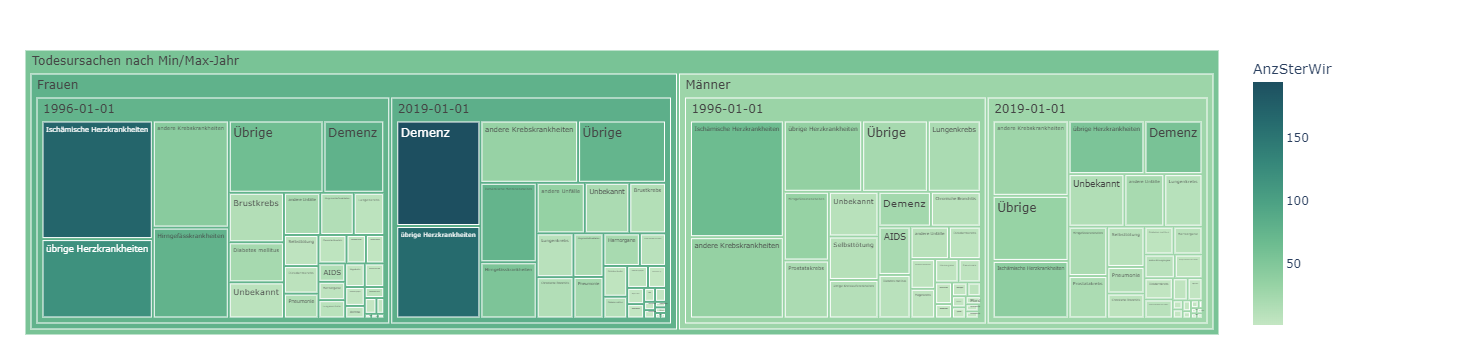

In [40]:
df = mySelYears
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Min/Max-Jahr"), 'Geschlecht','StichtagDatJahr','Todesursache'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blugrn')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


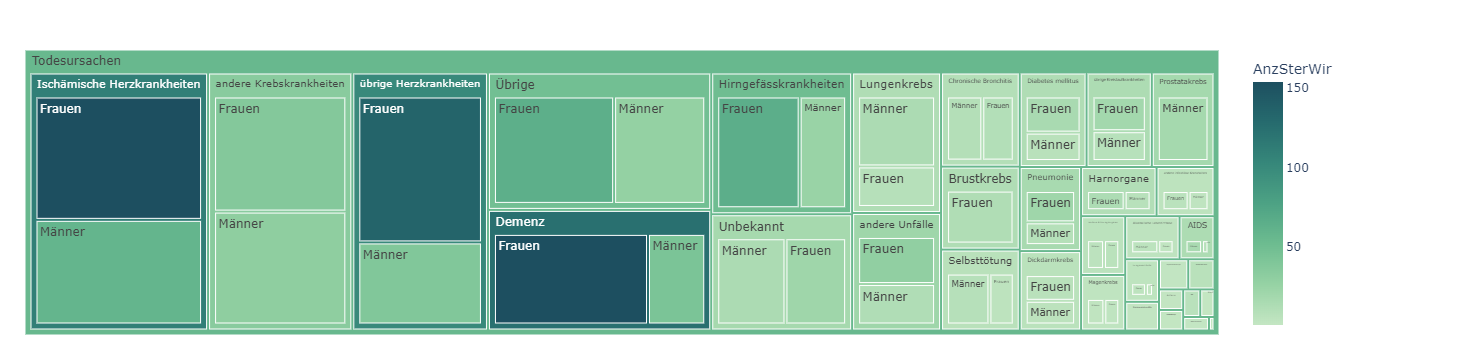

In [41]:
df = data2betested
fig = px.treemap(df, path=[px.Constant("Todesursachen"), 'Todesursache', 'Geschlecht'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blugrn')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()



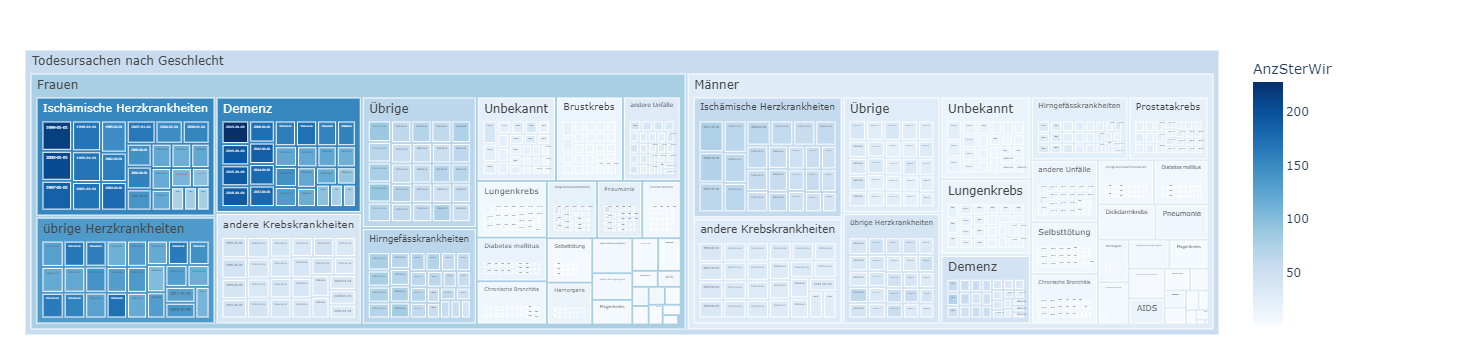

In [42]:
df = data2betested
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Geschlecht"), 'Geschlecht', 'Todesursache', 'StichtagDatJahr'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


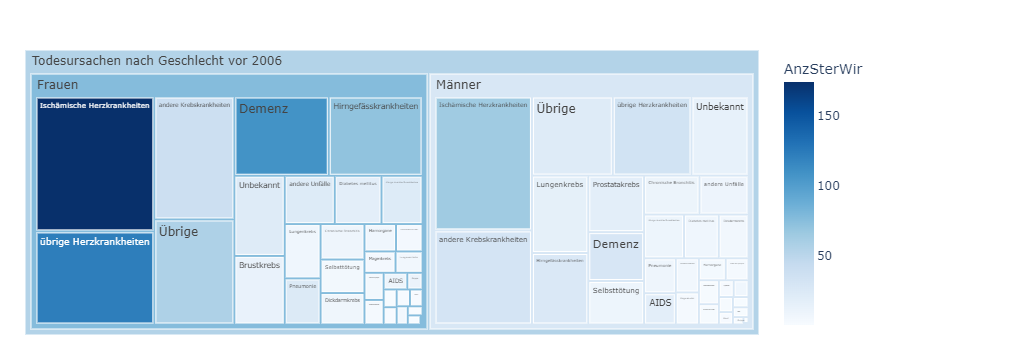

In [66]:
df = mySelYearsVor2006
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Geschlecht vor 2006"), 'Geschlecht', 'Todesursache'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


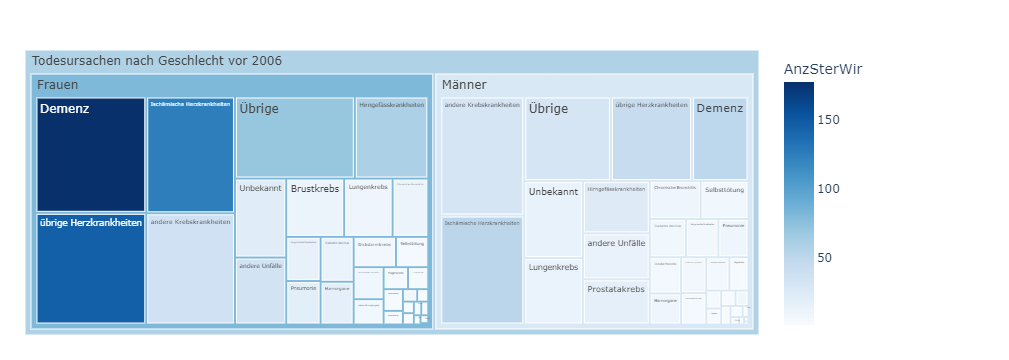

In [67]:
df = mySelYearsSeit2006
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Geschlecht vor 2006"), 'Geschlecht', 'Todesursache'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()

### Einfache Visualisierungen zur Plausi

Exploriere die Daten mit Pivottable.JS

In [43]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [44]:
mySelYears = data2betested[(data2betested.StichtagDatJahr == "2019")]


In [45]:
#myGraph= mySelYears[['TodesursacheSpezSort','TodesursacheSpezLang', 'AlterVSort_Nam', 'AnzSterWir']]
myGraph= mySelYears.groupby(['TodesursacheSort','Todesursache', 'AlterVSort_Nam'])['AnzSterWir'].sum()
myGraph

TodesursacheSort  Todesursache  AlterVSort_Nam
102               AIDS          1 – 14             0
                                15 – 29            0
                                30 – 44            0
                                45 – 59            1
                                60 – 64            0
                                                  ..
1300              Unbekannt     70 – 74           18
                                75 – 79           27
                                80 – 84           16
                                85 und älter      53
                                unter 1            0
Name: AnzSterWir, Length: 352, dtype: int64

In [48]:
myGraph.dtypes
murders = data2betested[(data2betested.Todesursache == "AIDS")]
murders

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
0,1995-01-01,AIDS,102,1,unter 1,0,Frauen
1,1995-01-01,AIDS,102,2,1 – 14,0,Frauen
2,1995-01-01,AIDS,102,3,15 – 29,2,Frauen
3,1995-01-01,AIDS,102,4,30 – 44,20,Frauen
4,1995-01-01,AIDS,102,5,45 – 59,2,Frauen
...,...,...,...,...,...,...,...
16110,2019-01-01,AIDS,102,7,65 – 69,0,Männer
16111,2019-01-01,AIDS,102,8,70 – 74,0,Männer
16112,2019-01-01,AIDS,102,9,75 – 79,0,Männer
16113,2019-01-01,AIDS,102,10,80 – 84,0,Männer


In [49]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]] 


highlight = alt.selection(type='single', on='mouseover',
                          fields=['StichtagDatJahr'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(murders).encode(
    x='StichtagDatJahr',
    y='AnzSterWir',
    color='Todesursache'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=700 , height=500
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines


alt.LayerChart(...)

In [50]:
alt.Chart(mySelYears).mark_circle(size=60).encode(
    x='AlterVSort_Nam',
    y='AnzSterWir',
    color='Todesursache',
    tooltip=['AlterVSort_Nam','AnzSterWir']
).interactive() # this makes the axes interactive: now you can zoom & pan


alt.Chart(...)

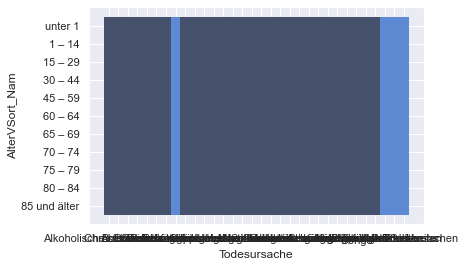

In [51]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelYears, x="Todesursache", y="AlterVSort_Nam") #, y="Nachname")
plt.show();